In [45]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [46]:
import pandas as pd

df_2019 = pd.read_excel('/content/2019.xlsx')
df_2020 = pd.read_excel('/content/2020.xlsx')
df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [47]:
df_2018 = pd.read_excel('/content/2018.xlsx')

In [48]:
df_2018['Q16']

,Q16
0,② 별로 그렇지 않다
1,④ 대체로 그렇다
2,④ 대체로 그렇다
3,⑤ 매우 그렇다
4,⑤ 매우 그렇다
...,...
16464,④ 대체로 그렇다
16465,⑤ 매우 그렇다
16466,⑤ 매우 그렇다
16467,⑤ 매우 그렇다


In [49]:
grade_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통이다': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

In [50]:
df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [51]:
df_2018['Q16']

,Q16
0,2.0
1,4.0
2,4.0
3,5.0
4,5.0
...,...
16464,4.0
16465,5.0
16466,5.0
16467,5.0


In [12]:
df_2018.columns

Index(['Q1', 'Q2A1', 'Q2A2', 'Q2A3', 'Q2A4', 'Q2A5', 'Q2_1', 'Q3A1', 'Q3A2',
       'Q3A3',
       ...
       'D_COU', 'D_GEN', 'D_AGE', 'D_Q5_1', 'D_Q13', 'D_Q1', 'DD_Q1', 'WT',
       'COUNTRY', 'CITY'],
      dtype='object', length=410)

In [13]:
df_2018['COUNTRY'].unique()

array(['프랑스', '중국', '대만', '영국', '페루', '러시아', '필리핀', '호주', '홍콩', '캐나다',
       '몽골', '인도', '아랍에미레이트', '우즈베키스탄', '이란', '독일', '네델란드', '멕시코', '스페인',
       '스위스', '베트남', '도미니카공화국', '인도네시아', '카자흐스탄', '미국', '싱가포르', '사우디아라비아',
       '태국', '노르웨이', '슬로베니아', '터키', '말레이시아', '오스트리아', '방글라데시', '키르기즈스탄',
       '포르투갈', '크로아티아', '아일랜드', '베냉', '이스라엘', '남아프리카공화국', '이탈리아', '브라질',
       '벨기에', '스웨덴', '브루나이', '루마니아', '타지키스탄', '헝가리', '알제리아', '핀란드',
       '스리랑카', '오만', '아르헨티나', '몰타', '폴란드', '쿠웨이트', '아프가니스탄', '요르단',
       '뉴질랜드', '모나코', '에스토니아', '이집트', '시리아', '레바논', '우크라이나', '칠레',
       '슬로바키아', '쿠바', '카타르', '에콰도르', '우루과이', '라트비아', '튀니지', '네팔', '이디오피아',
       '벨레지', '트리니다드토바크', '파키스탄', '체코', '덴마크', '불가리아', '코스타리카', '과테말라',
       '마카오', '일본', '가나', '탄자니아', '베네수엘라', '카메룬', '캄보디아', '티벳', '피지',
       '벨라루스', '미얀마', '그리스', '알바니아', '파라과이', '그루지아', '라이베리아', '예멘',
       '몬테네그로', '이라크', '콜롬비아', '온듀라스'], dtype=object)

In [52]:
df_2018['국가명'] = df_2018['COUNTRY']

In [53]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

In [17]:
# 2019 기준
high_2019 = df_2019.groupby("국가명")["Q16"].apply(lambda x: (x>=4).mean())

# 2024 기준 (예시, Q16 동일)
high_2024 = df_2024.groupby("국가명")["Q13"].apply(lambda x: (x>=4).mean())

증감 비율 계산

In [18]:
delta = (high_2024 - high_2019).dropna()
targets = delta[delta >= 0.05].sort_values(ascending=False)
print(targets)

국가명
프랑스    0.189154
일본     0.125364
태국     0.104781
독일     0.099626
중국     0.087502
홍콩     0.086826
영국     0.086271
미국     0.078733
캐나다    0.073093
대만     0.059752
러시아    0.050660
dtype: float64


# 연도별 (4-5점)재방문의사가 +5% 이상 증가한 국가

- 연도별 재방문 의향 변수 컬럼이 다르므로 매핑 설정

In [20]:
revisit_vars = {
    2018: 'Q16',
    2019: 'Q16',
    2020: 'Q6_1',
    2021: 'Q8',
    2022: 'Q8',
    2023: 'Q13',
    2024: 'Q13'
}

- 연도별 "고의향 재방문자(4–5점 비율)" 계산

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

datasets = {
    2018: df_2018,
    2019: df_2019,
    2020: df_2020,
    2021: df_2021,
    2022: df_2022,
    2023: df_2023,
    2024: df_2024
}

ratio = {}

for year, df in datasets.items():
    col = revisit_vars[year]
    # Q16, Q6_1 등의 컬럼을 숫자형으로 변경
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 숫자로 변환, 실패 시 NaN 처리
    df["high_revisit"] = df[col] >= 4  # 4~5점 응답자 비율
    ratio[year] = df.groupby("국가명")["high_revisit"].mean()

ratio_df = pd.DataFrame(ratio)

- +5% 이상 증가한 국가 추출

In [39]:
ratio_df["increase"] = ratio_df[2024] - ratio_df[2018]
targets = ratio_df.index[ratio_df["increase"] >= 0.05].tolist()

In [40]:
ratio_df.sort_values(by="increase", ascending=False)

,2018,2019,2020,2021,2022,2023,2024,increase
국가명,,,,,,,,
일본,0.763933,0.819106,0.412621,0.790393,0.939857,0.948992,0.944470,0.180537
프랑스,0.786458,0.764205,0.373134,0.832677,0.850724,0.947289,0.953358,0.166900
태국,0.844706,0.858182,0.409091,0.932432,0.980287,0.900485,0.962963,0.118257
독일,0.816121,0.819629,0.585185,0.846473,0.827885,0.922813,0.919255,0.103134
홍콩,0.848425,0.861635,0.500000,1.000000,0.931507,0.950119,0.948462,0.100036
...,...,...,...,...,...,...,...,...
포르투갈,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
폴란드,0.727273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
피지,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# 2018 값이 NaN이 아닌 국가만 추출
valid_base = ratio_df[2018].notna()

**재방문 의향 점수 4~5점 비율이 2018 대비 2024년에 5% 이상 상승한 국가**

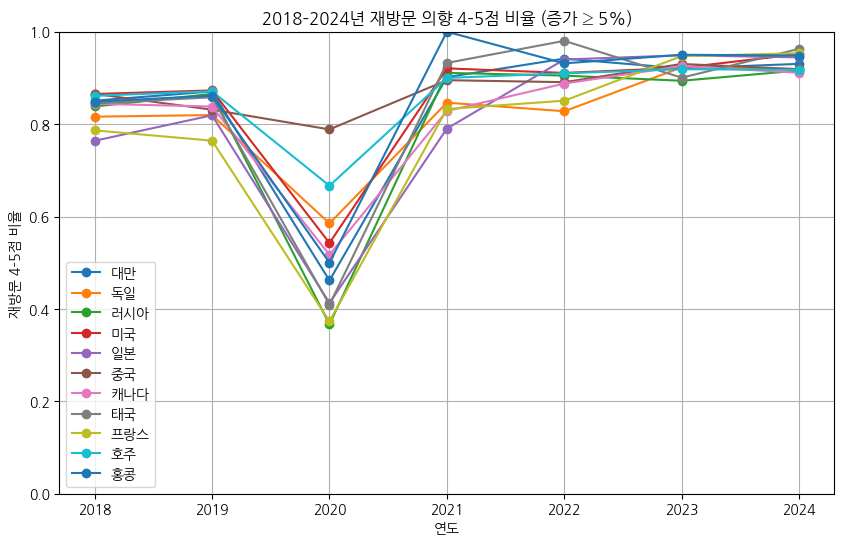

In [44]:
years = sorted(ratio_df.columns.drop("increase"))

plt.figure(figsize=(10,6))
for country in targets:
    plt.plot(years, ratio_df.loc[country, years], marker='o', label=country)

plt.xticks(years, [str(y) for y in years])
plt.ylim(0,1)
plt.xlabel("연도")
plt.ylabel("재방문 4–5점 비율")
plt.title("2018–2024년 재방문 의향 4–5점 비율 (증가 ≥ 5%)")
plt.legend(loc='best')
plt.grid(True)
plt.show()

| 시기            | 관찰 포인트                                               |
| ------------- | ---------------------------------------------------- |
| **2020년**     | 팬데믹 영향으로 전체 국가에서 **재방문 의향 급감**                       |
| **2021–2022** | 회복기 시작: 대부분의 국가에서 빠른 반등                              |
| **2023–2024** | 고의향 비율 **90% 이상 유지 or 상승** — 특히 미국, 일본, 태국, 대만, 홍콩 등 |


## 연도별 방한 목적 분포 확인

In [54]:
import pandas as pd

# 연도별 데이터프레임 딕셔너리 (이미 불러온 경우 생략 가능)
datasets = {
    2018: df_2018,
    2019: df_2019,
    2020: df_2020,
    2021: df_2021,
    2022: df_2022,
    2023: df_2023,
    2024: df_2024
}

# 방문 목적 컬럼명 연도별 매핑
purpose_vars = {
    2018: 'Q5_1',
    2019: 'Q3',
    2020: 'Q3',
    2021: 'Q3',
    2022: 'Q3',
    2023: 'Q1',
    2024: 'Q1'
}

# 방문 목적 분포 저장용
purpose_distribution = {}

# 연도별로 value_counts → 비율로 정규화
for year, df in datasets.items():
    col = purpose_vars[year]
    if col in df.columns:
        purpose_distribution[year] = df[col].value_counts(normalize=True).sort_index()

# DataFrame으로 변환
purpose_df = pd.DataFrame(purpose_distribution).fillna(0)

# 결과 출력
print(purpose_df)


       2021      2022      2023      2024
1  0.038844  0.373842  0.598481  0.627960
2  0.133006  0.128793  0.140529  0.128145
3  0.411186  0.315407  0.197024  0.190183
4  0.399385  0.159955  0.045814  0.040639
5  0.002581  0.002047  0.018153  0.013074
6  0.014997  0.019956  0.000000  0.000000


In [56]:
df_2021['Q3']

,Q3
0,3
1,3
2,2
3,2
4,3
...,...
8130,4
8131,4
8132,4
8133,4


# 2018년 재방문 (4-5점)의 방문 주요 활동 및 만족한 활동

 - 주요 참여 활동 : Q9_1A1 ~ Q9_1A20
 - 가장 만족한 활동 : Q9_2A1~Q9_2A3

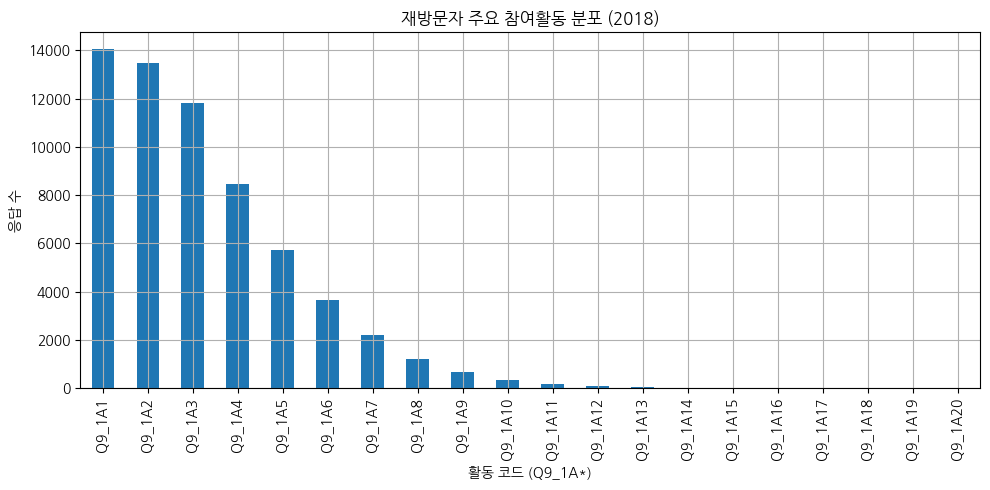

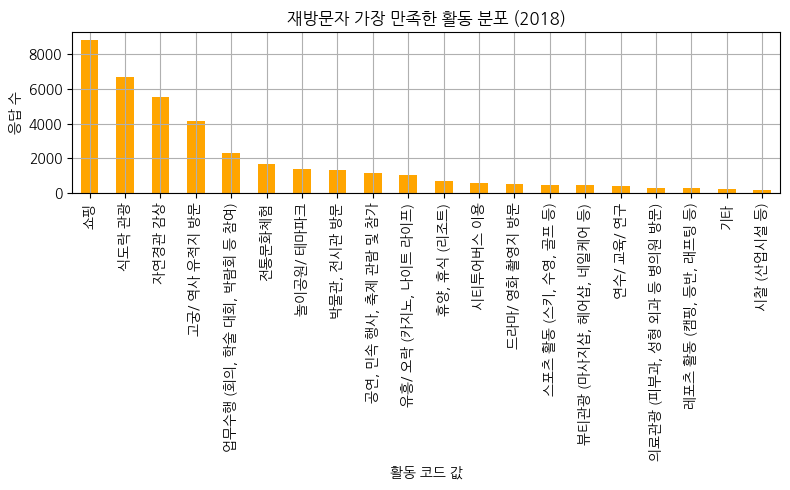

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# 4~5점 재방문자 필터링
df_high = df_2018[df_2018['Q16'] >= 4]

# 주요 참여활동 (Q9_1A1 ~ Q9_1A20)
activity_cols = [f"Q9_1A{i}" for i in range(1, 21)]
activity_counts = df_high[activity_cols].notna().sum().sort_values(ascending=False)

# 가장 만족한 활동 (Q9_2A1 ~ Q9_2A3)
satisfaction_cols = [f"Q9_2A{i}" for i in range(1, 4)]
satisfaction_counts = df_high[satisfaction_cols].stack().value_counts().sort_values(ascending=False)

# 시각화

# 참여활동
plt.figure(figsize=(10, 5))
activity_counts.plot(kind='bar')
plt.title('재방문자 주요 참여활동 분포 (2018)')
plt.xlabel('활동 코드 (Q9_1A*)')
plt.ylabel('응답 수')
plt.grid(True)
plt.tight_layout()
plt.show()

# 만족활동
plt.figure(figsize=(8, 5))
satisfaction_counts.plot(kind='bar', color='orange')
plt.title('재방문자 가장 만족한 활동 분포 (2018)')
plt.xlabel('활동 코드 값')
plt.ylabel('응답 수')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2024년 재방문 (4-5점)의 방문 주요 활동 및 만족한 활동

- 주요 참여 활동 : Q8a01 ~ Q8a20

- 가장 만족한 활동 : Q8_1a1 ~ Q8_1a3



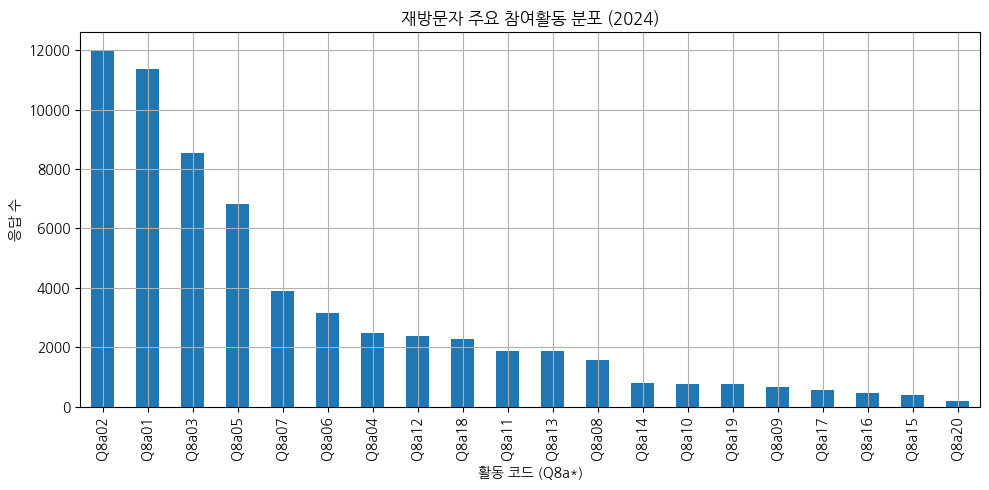

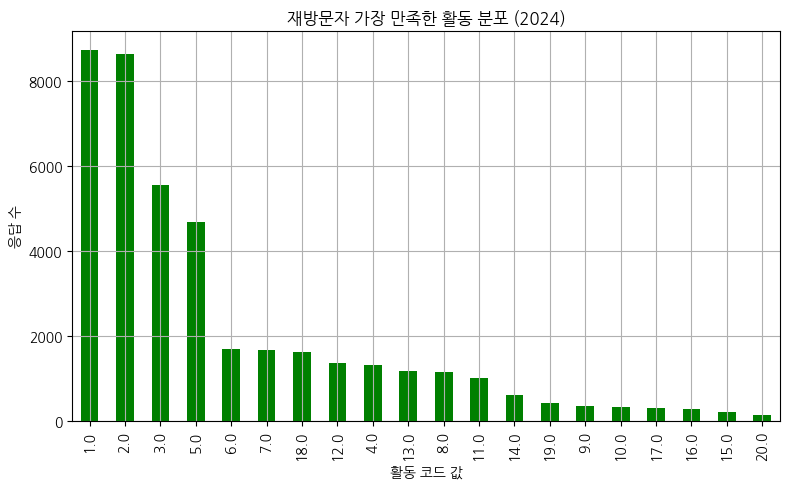

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 재방문 점수 추출 (Q13: 1~5점)
df_2024["Q13_numeric"] = pd.to_numeric(df_2024["Q13"], errors="coerce")
df_high_2024 = df_2024[df_2024["Q13_numeric"] >= 4]

# 2. 주요 참여 활동 (Q8a01 ~ Q8a20)
activity_cols_2024 = [f"Q8a{str(i).zfill(2)}" for i in range(1, 21)]
activity_counts_2024 = df_high_2024[activity_cols_2024].notna().sum().sort_values(ascending=False)

# 3. 가장 만족한 활동 (Q8_1a1 ~ Q8_1a3)
satisfaction_cols_2024 = [f"Q8_1a{i}" for i in range(1, 4)]
satisfaction_counts_2024 = df_high_2024[satisfaction_cols_2024].stack().value_counts().sort_values(ascending=False)

# 4. 시각화

# 주요 참여 활동 그래프
plt.figure(figsize=(10, 5))
activity_counts_2024.plot(kind='bar')
plt.title('재방문자 주요 참여활동 분포 (2024)')
plt.xlabel('활동 코드 (Q8a*)')
plt.ylabel('응답 수')
plt.grid(True)
plt.tight_layout()
plt.show()

# 가장 만족한 활동 그래프
plt.figure(figsize=(8, 5))
satisfaction_counts_2024.plot(kind='bar', color='green')
plt.title('재방문자 가장 만족한 활동 분포 (2024)')
plt.xlabel('활동 코드 값')
plt.ylabel('응답 수')
plt.grid(True)
plt.tight_layout()
plt.show()